In [1]:
import numpy as np

In [2]:
A = np.array([[4 ,6], 
              [1, 3]])

A_eigenvalues = [6, 1]
A_eigenvector = [np.array([3,1])/np.linalg.norm(np.array([3,1])),
                 np.array([-2,1])/np.linalg.norm(np.array([-2,1]))]


B = np.array([[1, 4, 0], 
              [4, 1, 0], 
              [0, 0, -2]])

B_eigenvalues = [5, -3, -2]
B_eigenvector = [np.array([1,1,0])/np.linalg.norm(np.array([1,1,0])), 
                 np.array([-1,1,0])/np.linalg.norm(np.array([-1,1,0])), 
                 np.array([0,0,1])/np.linalg.norm(np.array([0,0,1]))]

# Power and Shift methods

### Implement the power method

In [3]:
def power_method(A):
    """
    Compute the dominant eigenpair of a square matrix using the Power Method.

    Parameters
    ----------
    A : numpy array, shape (n, n)

    Returns
    -------
    s : ndarray, shape (n,)
        Approximation of the dominant eigenvector of A, normalized to unit length.
    lambda_hat : float
        Approximation of the dominant eigenvalue of A. 

    Notes
    -----
    - Starts from a random initial vector.
    - Iterates until consecutive eigenvalue estimates differ by less than 1e-14.
    - Uses the ratio of norms (Rayleigh quotient approximation) for eigenvalue.
    - Adjusts sign of the eigenvalue to ensure consistency of the returned eigenvector.
    """
    s = np.random.rand(A.shape[0])
    eigval_old = 1
    eigval_new = 5

    
    while not (abs(eigval_new - eigval_old) < 1e-14): 
        eigval_old = eigval_new
        t = A@s #transformed s vector
        i = np.argmax(t)
        eigval_new = np.linalg.norm(t) #eigen value estimate, getting the euclidean norm of t, which is also the eigen value
        s = t / eigval_new #new eigen vector estimate
        
    if (A@s)[i]/s[i] < 0:
        lamda_hat = -eigval_new
    else:
        lamda_hat = eigval_new

    return (s, lamda_hat)


In [4]:
def test_eigenpair(eigenvalue, eigenvector, ref_eigenvalue, ref_eigenvector):
    """
        Compare two eigenpairs (eigenvalue, eigenvector)-tuples.
        Eigenvectors are expected to be collinear, but can point into
        opposite directions.,→
        :param eigenvalue: scalar
        :param eigenvector: n-dimensional vector
        :param expected_eigenvalue: scalar
        :param expected_eigenvector: n-dimensional vector
        :return: True if eigenpairs are equivalent
    """
    assert np.allclose(eigenvalue, ref_eigenvalue)
    ev_normed = eigenvector / np.linalg.norm(eigenvector)
    refv_normed = ref_eigenvector / np.linalg.norm(ref_eigenvector)
    test = lambda vector: np.allclose(0, np.sum(vector**2))
    assert test(ev_normed-refv_normed) or test(ev_normed+refv_normed)
    return True

In [5]:
## Test case A

eigvec, eigval = power_method(A)
print("---Test Case A---")
print("Eigenvalue:", eigval)
print("Eigenvector:", eigvec)

assert(test_eigenpair(eigval, eigvec, A_eigenvalues[0], A_eigenvector[0]))


## Test case B

eigvec, eigval = power_method(B)

print("\n---Test Case B---")
print("Eigenvalue:", eigval)
print("Eigenvector:", eigvec)


assert(test_eigenpair(eigval, eigvec, B_eigenvalues[0], B_eigenvector[0]))


---Test Case A---
Eigenvalue: 6.000000000000001
Eigenvector: [0.9486833  0.31622777]

---Test Case B---
Eigenvalue: 4.9999999999999964
Eigenvector: [7.07106801e-01 7.07106761e-01 8.41466660e-13]


### Implement the shift method computing the most dominant and the least dominant eigenpair

In [6]:
def shift_method(A, p):
    """
    Compute both the dominant and the shifted (nearest-to-p) eigenpairs of a square matrix.

    This uses the Power Method on A to find its largest-magnitude eigenpair,
    and on (A - pI) to find the eigenvalue of A closest to the shift p.

    Parameters
    ----------
    A : array_like, shape (n, n)
       
    p : float
        Shift value. 

    Returns
    -------
    eigenvector_shifted : ndarray, shape (n,)
        Approximation of the eigenvector of A corresponding to the eigenvalue
        closest to the shift p.
    eigenvalue_shifted : float
        Approximation of the eigenvalue of A closest to p.
    eigenvector_dominant : ndarray, shape (n,)
        Approximation of the dominant eigenvector of A (largest absolute eigenvalue).
    eigenvalue_dominant : float
        Approximation of the dominant eigenvalue of A.
    """
    # Shifted matrix
    B = A - p * np.identity(A.shape[0])
    # Use power method on (A - pI)
    eigenvector_A, eigenvalue_A = power_method(A)
    eigenvector_B, eigenvalue_B = power_method(B)

    # Recover eigenvalue of A
    eigenvalue_least = eigenvalue_B + p

    return eigenvector_B, eigenvalue_least, eigenvector_A, eigenvalue_A

In [7]:
## Test case A
eigvec_sub, eigval_sub, eigvec_dom, eigval_dom = shift_method(A, 6)

print("---Test Case A---")
print("Least dominant Eigenvalue:", eigval_sub)
print("Least dominant Eigenvector:", eigvec_sub)

print("Most dominant Eigenvalue:", eigval_dom)
print("Most dominant Eigenvector:", eigvec_dom)

assert(test_eigenpair(eigval_sub, eigvec_sub, A_eigenvalues[1], A_eigenvector[1])) # <----- test_eigenpair

## Test case B
eigvec_sub, eigval_sub, eigvec_dom, eigval_dom = shift_method(B, 5)

print("\n---Test Case B---")
print("Least dominant Eigenvalue:", eigval_sub)
print("Least dominant Eigenvector:", eigvec_sub)

print("Most dominant Eigenvalue:", eigval_dom)
print("Most dominant Eigenvector:", eigvec_dom)

assert(test_eigenpair(eigval_sub, eigvec_sub, B_eigenvalues[1], B_eigenvector[1])) # <----- test_eigenpair



---Test Case A---
Least dominant Eigenvalue: 1.0
Least dominant Eigenvector: [ 0.89442719 -0.4472136 ]
Most dominant Eigenvalue: 6.000000000000001
Most dominant Eigenvector: [0.9486833  0.31622777]

---Test Case B---
Least dominant Eigenvalue: -2.9999999999999734
Least dominant Eigenvector: [-7.07106781e-01  7.07106781e-01 -1.47682467e-07]
Most dominant Eigenvalue: 4.9999999999999964
Most dominant Eigenvector: [ 7.07106802e-01  7.07106761e-01 -3.92662721e-11]


# Deflation method, normalisation, and covariance

### Implement the deflation method

In [8]:
from IPython.display import Image, display

In [9]:
def deflation_method(A, eigval_1, eigvec_1):
    """
    Compute the next dominant eigenpair of a symmetric matrix after removing
    the contribution of its first (largest) eigenpair via rank-1 deflation.

    Parameters
    ----------
    A : array_like, shape (n, n)
        Real symmetric matrix whose eigenpairs are being computed.
    eigval_1 : float
        The dominant eigenvalue of A that has already been computed.
    eigvec_1 : array_like, shape (n,)
        The unit-norm eigenvector corresponding to eigval_1.

    Returns
    -------
    eigvec_next : ndarray, shape (n,)
        Approximation of the eigenvector corresponding to the next-largest
        eigenvalue of A (after deflation).
    eigval_next : float
        Approximation of the next-largest eigenvalue of A.
    C : ndarray, shape (n, n)
        The deflated matrix A - eigval_1 * (eigvec_1 @ eigvec_1ᵀ) used to
        compute the next eigenpair.
    """
    
    eigvec_1 = eigvec_1 / np.linalg.norm(eigvec_1)  # Ensure unit vector
    C = A - eigval_1 * np.outer(eigvec_1, eigvec_1)  # Deflated matrix
    eigvec_next, eigval_next = power_method(C)       # Next eigenpair
    return eigvec_next, eigval_next, C

In [10]:
## Test case A
eigvec_dom = np.array([3, 1])

eigvec_C, eigval_C, _ = deflation_method(A, 6, eigvec_dom)

print("---Test Case A---")
print("Least dominant Eigenvalue:", eigval_C)
print("Least dominant Eigenvector:", eigvec_C,"\n")


## Test case B
eigvec_dom = np.array([1, 1, 0])

eigvec_C, eigval_C, _ = deflation_method(B, 5, eigvec_dom)

print("---Test Case B---")
print("Least dominant Eigenvalue:", eigval_C)
print("Least dominant Eigenvector:", eigvec_C)

assert(test_eigenpair(eigval_C, eigvec_C, B_eigenvalues[1], B_eigenvector[1])) # <---- test_eigenpair


---Test Case A---
Least dominant Eigenvalue: 0.9999999999999991
Least dominant Eigenvector: [0.86824314 0.49613894] 

---Test Case B---
Least dominant Eigenvalue: -2.9999999999999925
Least dominant Eigenvector: [-7.07106781e-01  7.07106781e-01  6.29325549e-08]


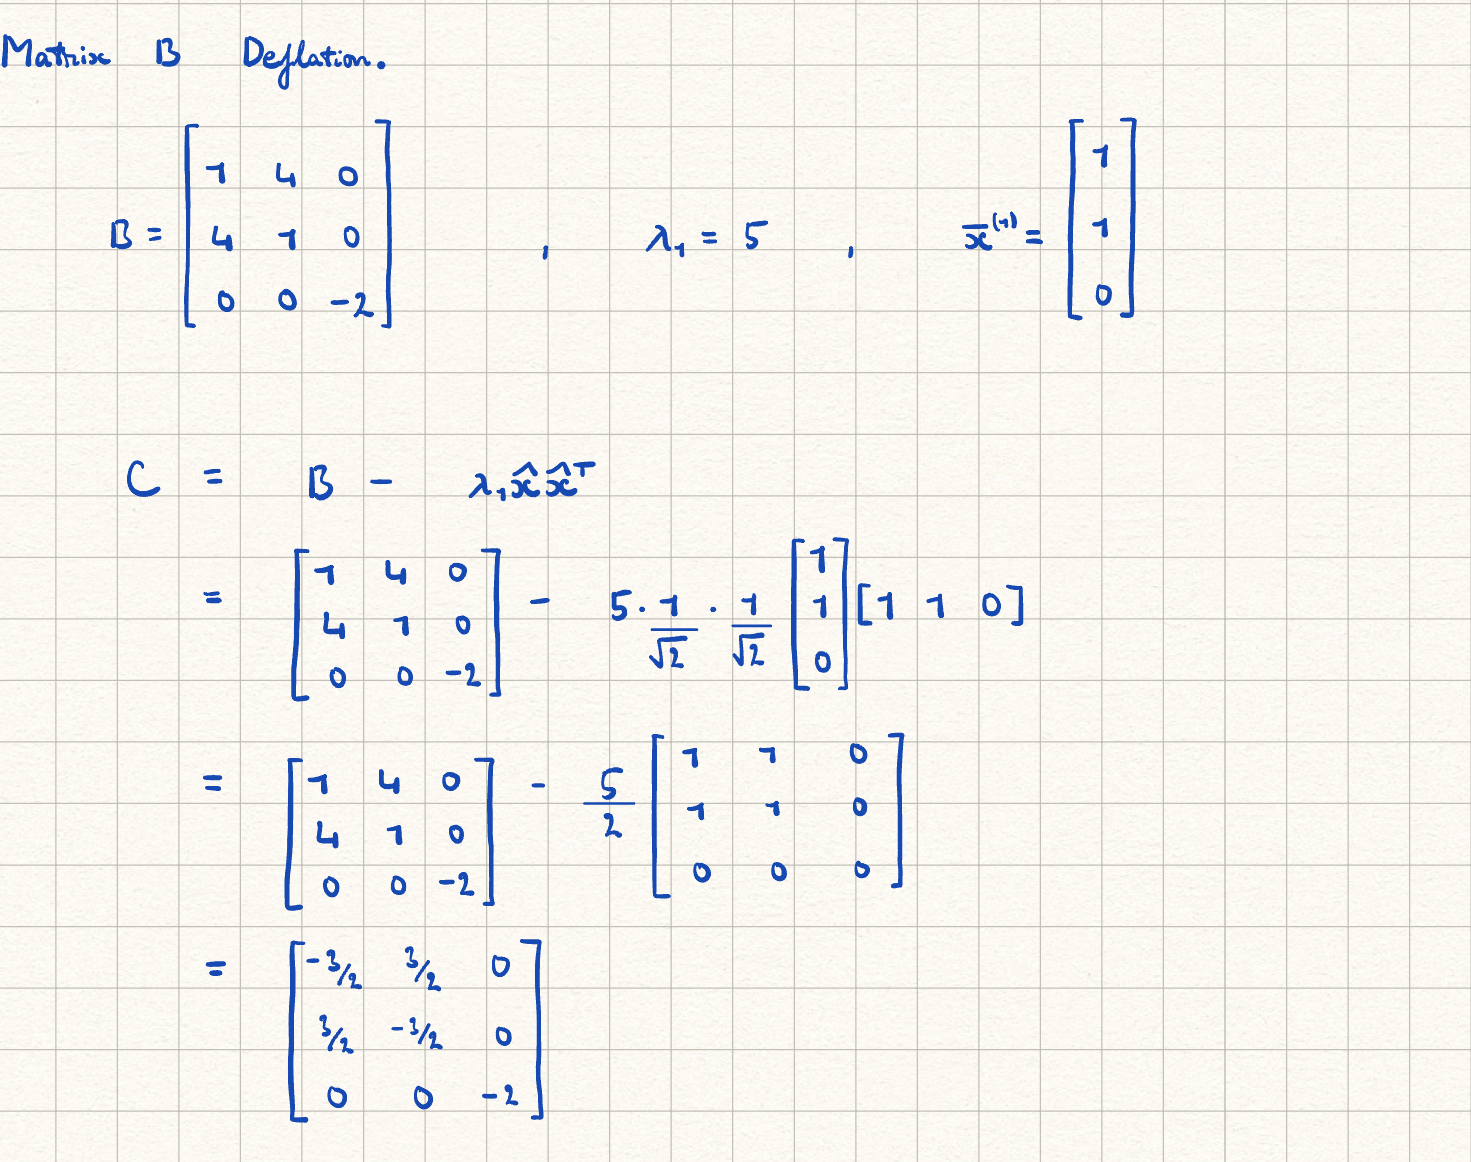

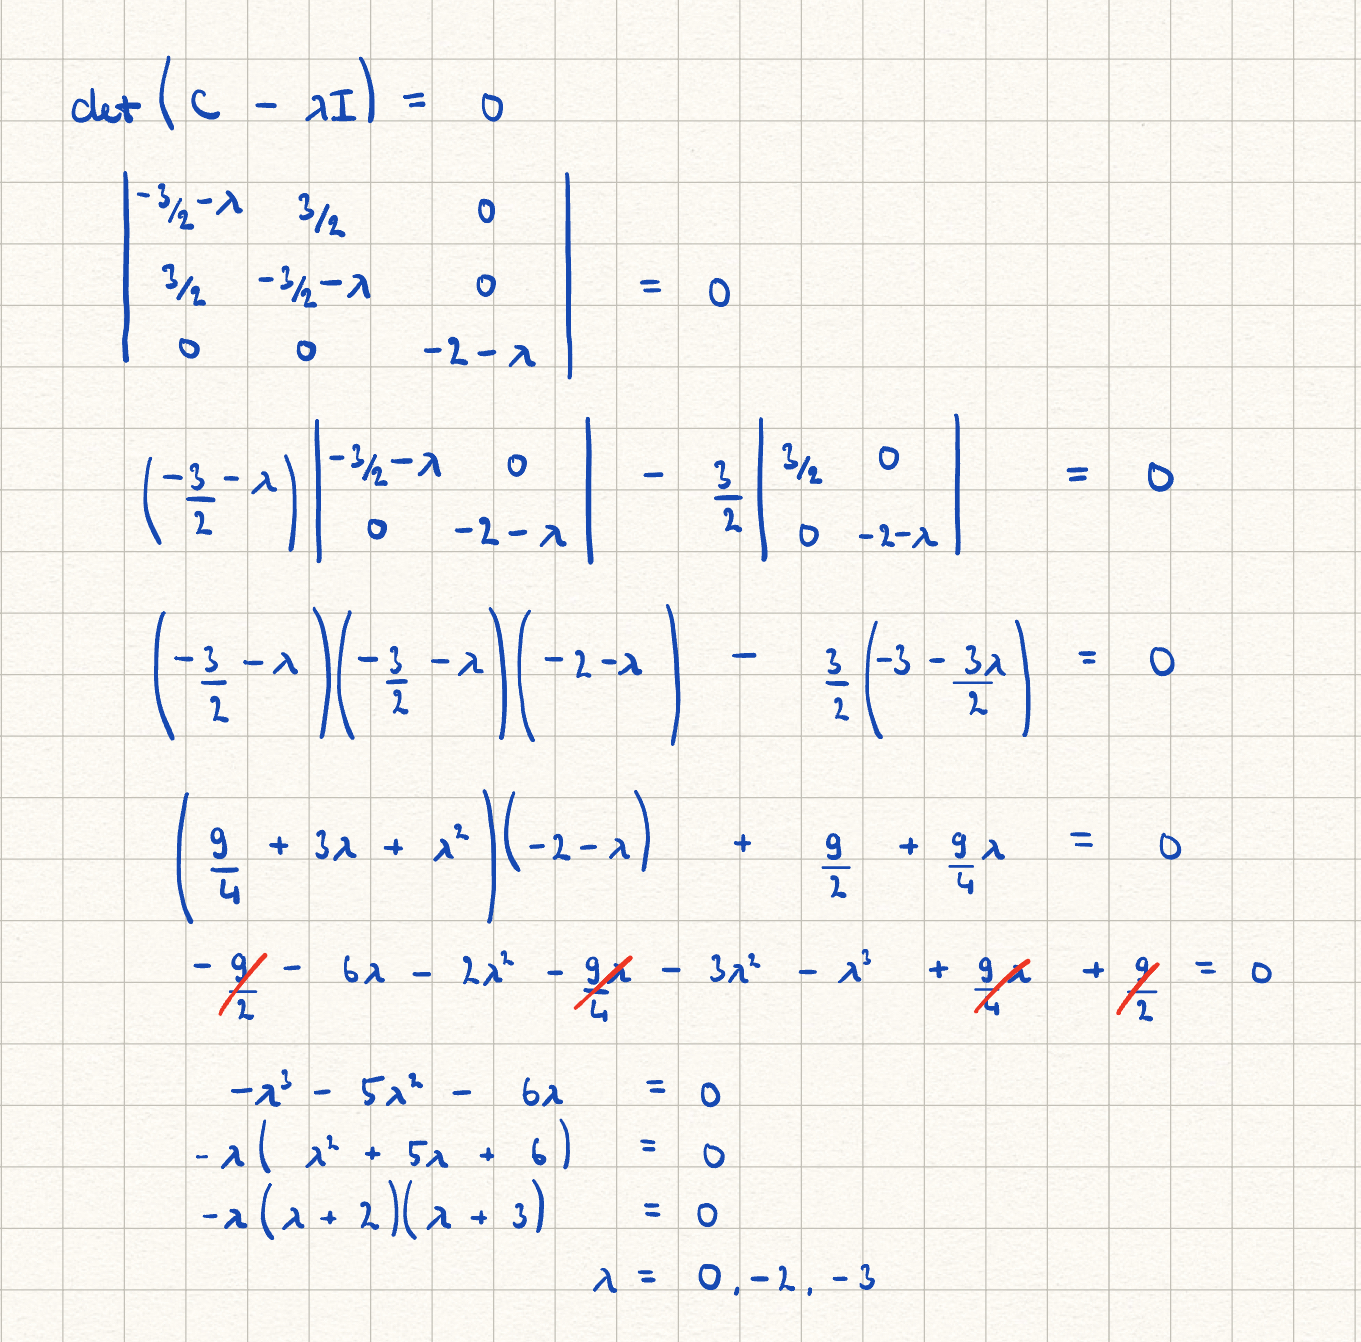

In [11]:
display(Image(filename="images/Deflation_hand_calc_1.jpg"))
display(Image(filename="images/Deflation_hand_calc_2.jpg"))

### Implement an eigenpairs function

In [12]:
def eigenpairs(A):
    """
    Compute all eigenpairs of a real symmetric matrix using the Power Method and deflation.

    This function iteratively extracts the dominant eigenvalue and eigenvector of the input
    matrix A via the Power Method, then removes its contribution by rank-1 deflation, and
    repeats the process until all n eigenpairs are obtained.

    Parameters
    ----------
    A : array_like, shape (n, n)
        Real symmetric square matrix for which all eigenpairs are to be computed.

    Returns
    -------
    eig_pairs : list of tuples [(lambda_1, v_1), (lambda_2, v_2), ..., (lambda_n, v_n)]
        A list containing n tuples, each consisting of an eigenvalue and its corresponding
        normalized eigenvector. The eigenvalues are returned in descending order of magnitude.

    Notes
    -----
    - AssertionError If the input matrix A is not real and symmetric.
    """

    #check if matrix is square:
    n, m = A.shape
    assert np.isrealobj(A), "Matrix must have real entries"
    assert np.allclose(A, A.T), "Matrix must be symmetric"

    eig_pairs = []
    eigvec_A, eigval_A = power_method(A)
    eig_pairs.append((eigval_A,eigvec_A))

    for _ in range(n-1):
        eigvec_C, eigval_C, A = deflation_method(A, eigval_A, eigvec_A)
        eig_pairs.append((eigval_C,eigvec_C))
        eigval_A, eigvec_A = eigval_C, eigvec_C

    return eig_pairs
    

In [13]:
#test for symmetric 
try:
    eigenpairs(A)
except AssertionError:
    print("Function correctly identifies Asymmetric matrices")

Function correctly identifies Asymmetric matrices


In [14]:
#All eigenpairs test
pairs = eigenpairs(B)

print("\nAll eigenpairs (in descending dominance):\n")
for idx, (lam, vec) in enumerate(pairs, start=1):
    print(f"  {idx:>2}. Eigenvalue = {lam}")
    print(f"      Eigenvector = {vec}\n")

    assert(test_eigenpair(lam, vec, B_eigenvalues[idx-1], B_eigenvector[idx-1]))



All eigenpairs (in descending dominance):

   1. Eigenvalue = 4.9999999999999964
      Eigenvector = [ 7.07106762e-01  7.07106801e-01 -9.83856732e-13]

   2. Eigenvalue = -3.0000000000000013
      Eigenvector = [ 7.07106748e-01 -7.07106814e-01 -6.49378577e-08]

   3. Eigenvalue = -2.000000000000006
      Eigenvector = [-6.88752569e-08  6.88787417e-08 -1.00000000e+00]



### Centers the input matrix Function

In [15]:
def center(A):
    """
    Center each column of the input matrix by subtracting its mean.

    Parameters
    ----------
    A : array_like, shape (n_samples, n_features)
        Data matrix whose columns will be mean-centered.

    Returns
    -------
    centered : ndarray, same shape as A
        Column-wise mean-centered data matrix.
    """
    num_rows = A.shape[0]
    col_mean = sum(A) / num_rows

    return A - col_mean

In [16]:
Bc_expected = 1/3 * np.array([
    [-2, 7, 2],
    [7, -2, 2],
    [-5, -5, -4]
])

Bc = center(B)

assert np.allclose(Bc_expected, Bc), "Centered Matrix is diffrent from expected"

print("Expected Centered B:\n", Bc_expected)
print("\nCentered B:\n", Bc)

Expected Centered B:
 [[-0.66666667  2.33333333  0.66666667]
 [ 2.33333333 -0.66666667  0.66666667]
 [-1.66666667 -1.66666667 -1.33333333]]

Centered B:
 [[-0.66666667  2.33333333  0.66666667]
 [ 2.33333333 -0.66666667  0.66666667]
 [-1.66666667 -1.66666667 -1.33333333]]


### Computing the covariance matrix Function

In [17]:
def covar(A):
    """
    Compute the sample covariance matrix of a mean-centered data matrix.

    Parameters
    ----------
    A : array_like, shape (n_samples, n_features)
        Mean-centered data matrix.

    Returns
    -------
    cov : ndarray, shape (n_features, n_features)
        Covariance matrix.
    """
    n = A.shape[0]
    return (1/(n - 1)) * A.T @ A

In [18]:
Bcov_expected = 1/6 * np.array([[26, -1, 10],
                              [-1, 26, 10] , 
                              [10, 10, 8]])

Bcov = covar(Bc)

assert np.allclose(Bc_expected, Bc), "Covariance Matrix is diffrent from expected"

print("Expected Covariance B:\n", Bcov_expected)
print("\nCovariance B:\n", Bcov)

Expected Covariance B:
 [[ 4.33333333 -0.16666667  1.66666667]
 [-0.16666667  4.33333333  1.66666667]
 [ 1.66666667  1.66666667  1.33333333]]

Covariance B:
 [[ 4.33333333 -0.16666667  1.66666667]
 [-0.16666667  4.33333333  1.66666667]
 [ 1.66666667  1.66666667  1.33333333]]


# Lab Principal Component Analysis

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
X = pd.read_csv('DS19hH2_dk0_FTIR_Spectra_instant_coffee.csv')
y = ['Arabica'] * 29 + ['Robusta'] * (X.shape[0] - 29)
wavelengths = X.columns.to_list()

In [21]:
X.head()

810.548    814.408    818.268    822.128    825.988  829.8480000000001  \
0  21.227620  21.837509  22.729975  22.517663  21.040178          19.256306   
1  10.364243  10.569554  10.448875  10.100696   9.620371           8.882499   
2  13.118324  13.507084  13.473495  12.871428  12.181919          11.239480   
3  15.668409  15.803868  15.977607  15.569489  14.950423          14.029599   
4  16.634960  17.055263  17.610495  17.211594  16.217897          15.287750   

   833.7080000000001    837.568    841.428    845.288  ...  1875.904  \
0          18.517982  18.347773  18.044034  17.735858  ...  4.299971   
1           8.415529   8.210217   7.916430   7.806151  ...  1.518927   
2          10.515672  10.468178  10.428742  10.212771  ...  2.273844   
3          13.396739  13.092360  12.784991  12.829988  ...  3.075677   
4          14.424133  13.928921  13.551499  13.288979  ...  3.379194   

   1879.764  1883.624  1887.484  1891.344  1895.204  1899.0639999999999  \
0  4.271924  4.251176  4.219551  4.168709  4.129133            4.105336   
1  1.505118  1.493133  1.475563  1.464682  1.456444            1.442087   
2  2.254481  2.236715  2.214229  2.196218  2.181646            2.164602   
3  3.046015  3.020125  2.987411  2.963816  2.954810            2.942520   
4  3.342549  3.310964  3.281866  3.263161  3.241584            3.213549   

   1902.924  1906.7839999999999  1910.644  
0  4.078105            4.051912  4.042686  
1  1.433698            1.425288  1.418705  
2  2.146423            2.133255  2.121559  
3  2.909018            2.880989  2.876201  
4  3.183820            3.157357  3.146584  

[5 rows x 286 columns]

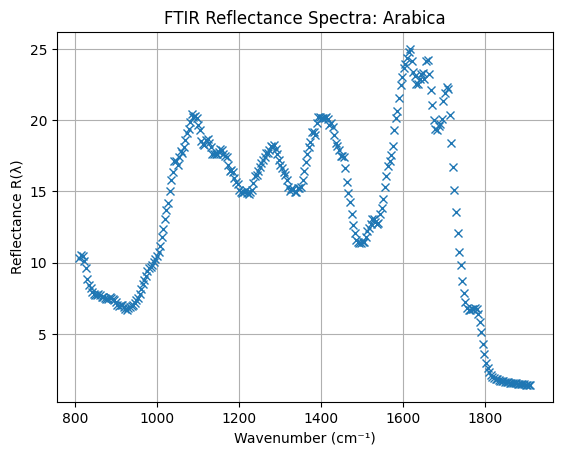

In [22]:
plt.plot(X.columns.astype(float), X.iloc[1],'x')

plt.title("FTIR Reflectance Spectra: Arabica")
plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Reflectance R(λ)")
plt.grid(True)
plt.show()


### Visualise the dataset and elaborate on the problem of discriminating the two different types of spectra.

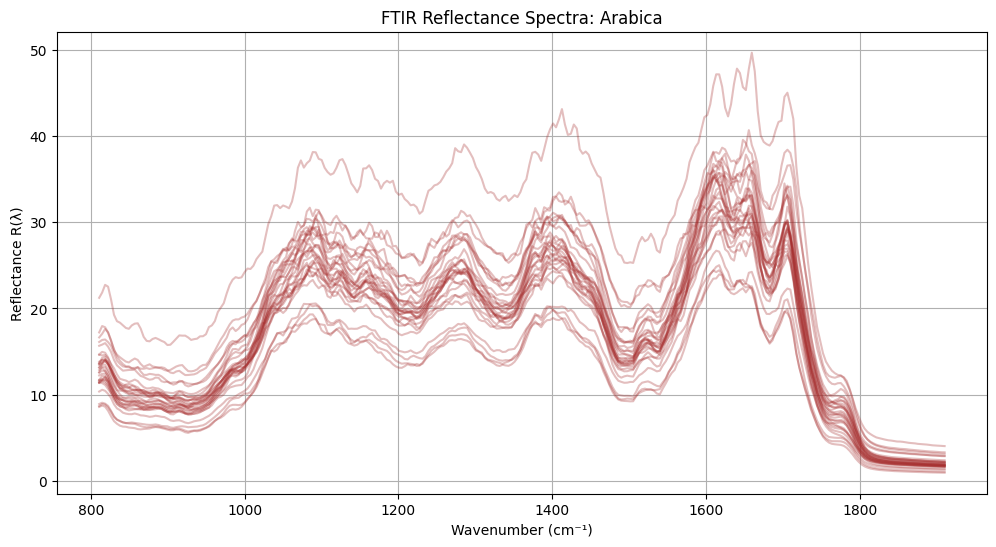

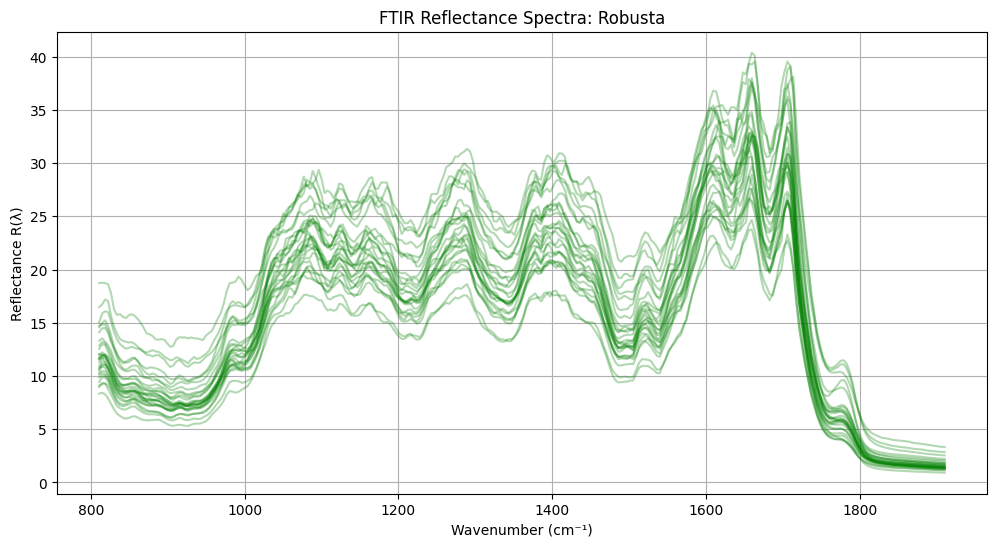

/var/folders/np/r8rphpf9409_hjqtj0plj6x80000gp/T/ipykernel_7172/1493021753.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


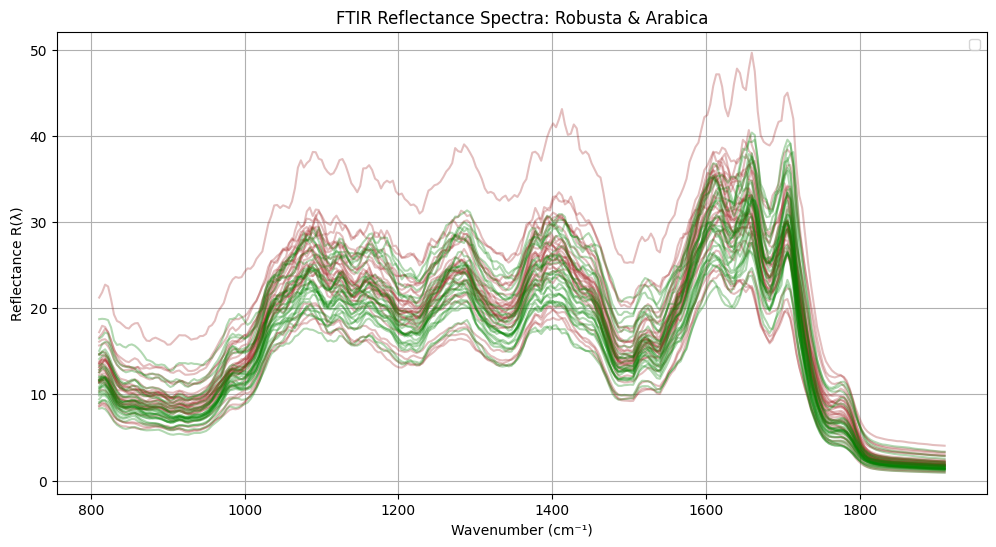

In [23]:
X_arabica = X.iloc[:29] #Each rows corresponds to a sample of arabica
X_robusta = X.iloc[29:]

# Arabica
plt.figure(figsize=(12, 6))

for i in range(X_arabica.shape[0]):
    plt.plot(X_arabica.columns.astype(float), X_arabica.iloc[i], color='brown', alpha=0.3)

plt.title("FTIR Reflectance Spectra: Arabica")
plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Reflectance R(λ)")
plt.grid(True)
plt.show()

# Robusta
plt.figure(figsize=(12, 6))

for i in range(X_robusta.shape[0]):
    plt.plot(X_robusta.columns.astype(float), X_robusta.iloc[i], color='green', alpha=0.3)

plt.title("FTIR Reflectance Spectra: Robusta")
plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Reflectance R(λ)")
plt.grid(True)
plt.show()


# Arabica & Robusta
plt.figure(figsize=(12, 6))

for i in range(X_arabica.shape[0]):
    plt.plot(X_arabica.columns.astype(float), X_arabica.iloc[i], color='brown', alpha=0.3)


for i in range(X_robusta.shape[0]):
    plt.plot(X_robusta.columns.astype(float), X_robusta.iloc[i], color='green', alpha=0.3)

plt.title("FTIR Reflectance Spectra: Robusta & Arabica")
plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Reflectance R(λ)")
plt.legend()
plt.grid(True)
plt.show()


The first plot shows Arabica reflectance and the second shows Robusta reflectance. Both beans exibit very similar spectra and there are no obvious way to discriminate each class. The 3rd plot showing Arabica in Red and Robusta in Blue futher shows that there are no obvious criteria to discriminate the 2 bean type.

### Compute and visualise the covariance matrix. Interpret the figure.

(56, 286)
(286, 286)


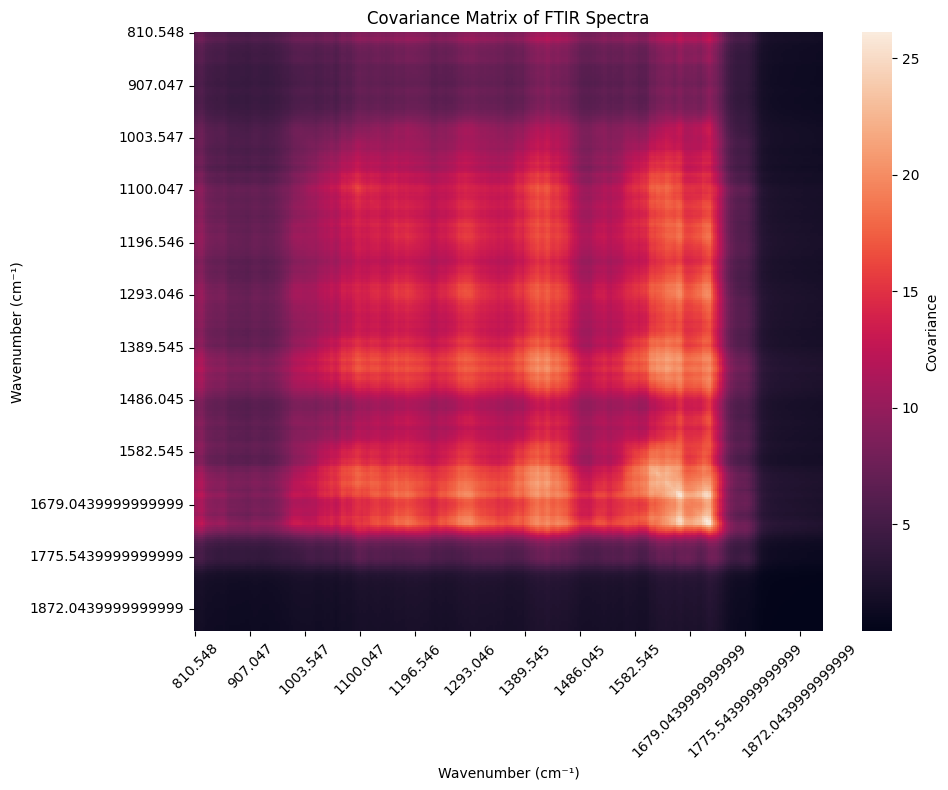

In [24]:
X_array = X.to_numpy()
print(X_array.shape)

wavenumbers = X.columns.astype(float) 

X_array = center(X_array)
X_cov = covar(X_array)

print(X_cov.shape)

# put labels back on
cov_df = pd.DataFrame(X_cov, index=wavenumbers, columns=wavenumbers)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cov_df,
    xticklabels=25,   
    yticklabels=25,
    cbar_kws={"label": "Covariance"}
)

ax.set_xlabel("Wavenumber (cm⁻¹)")
ax.set_ylabel("Wavenumber (cm⁻¹)")
ax.set_title("Covariance Matrix of FTIR Spectra")

ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()


The reflectant around 1000 - 1680 shows the most correlation, in a square pattern. As the wavenumber increases, the correlation also increase, peaking at around 1600.

### Compute the eigenpairs of the covariance matrix and scree plot

In [25]:
def to_dataframe(X_array):
    """this assumes the covariance matrix as input"""
    
    return pd.DataFrame(X_array, 
                        index=X.columns,    # row labels
                        columns=X.columns   # column labels
                        )

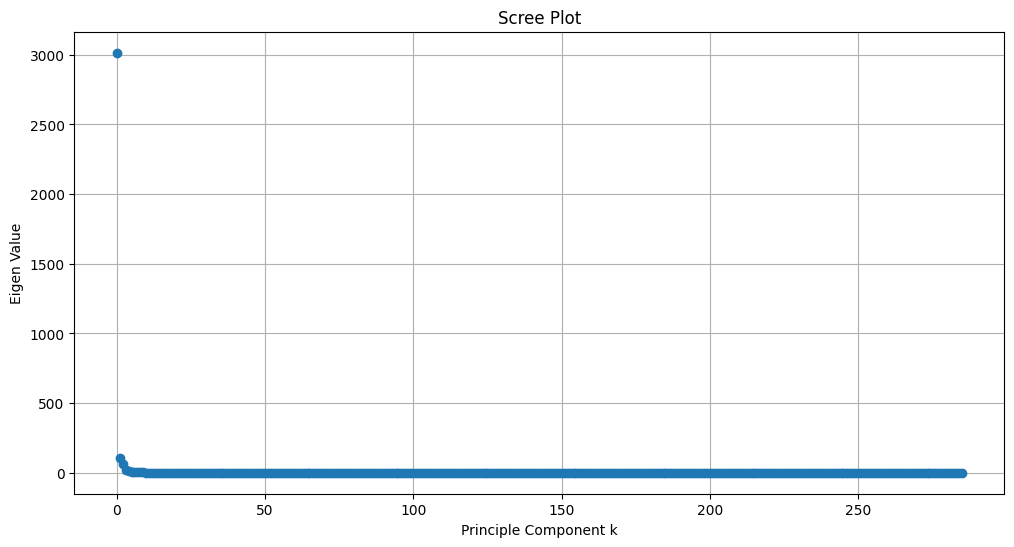

In [26]:
all_eigen_pairs = eigenpairs(X_cov)
all_eigen_val = [all_eigen_pairs[i][0] for i in range(len(all_eigen_pairs))]

#print(len(all_eigen_pairs))
#print(all_eigen_pairs[0])

plt.figure(figsize=(12,6))

#plt.plot(X_robusta.columns.astype(float), X_robusta.iloc[i], color='green', alpha=0.3)
plt.plot(all_eigen_val, 'o')

plt.title("Scree Plot")
plt.xlabel("Principle Component k")
plt.ylabel("Eigen Value")
plt.grid(True)
plt.show()


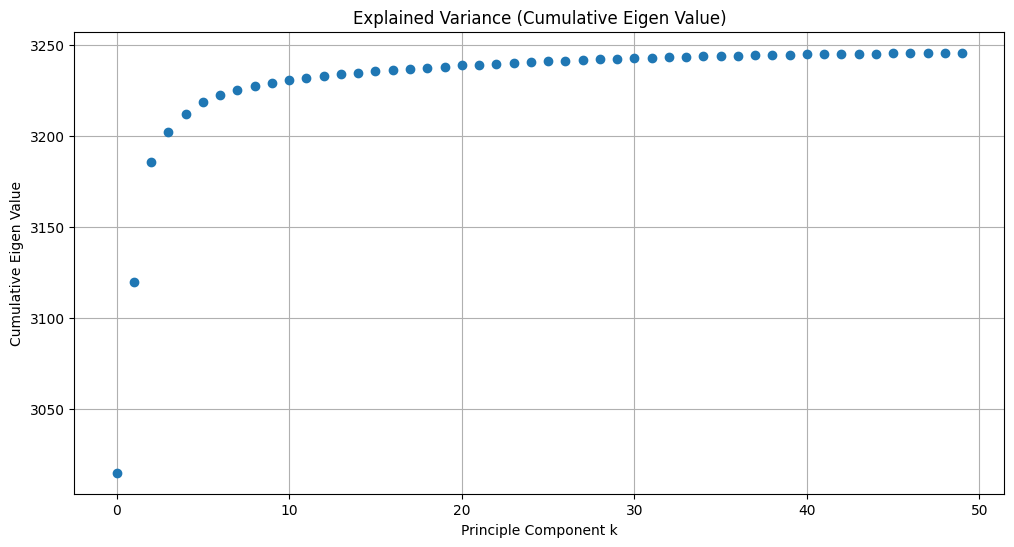

In [27]:
#cumulative.
cum_eigen_val = []

for i in range(len(all_eigen_val)):
    cum_eigen_val.append(sum(all_eigen_val[:i+1]))

plt.figure(figsize=(12,6))

plt.plot(cum_eigen_val[:50], 'o')

plt.title("Explained Variance (Cumulative Eigen Value)")
plt.xlabel("Principle Component k")
plt.ylabel("Cumulative Eigen Value")
plt.grid(True)
plt.show()

Given the Cumulative Scree plot, we can see that the neck of the chart is at k = ~6. 
So we will take the 6 largest eigen value pair. 

### Projecting the spectra on the most important principal components.

In [28]:
V = np.array([all_eigen_pairs[i][1] for i in range(6)]).T

Y_PC = np.zeros((X_array.shape[0],V.shape[1])) 
Y_PC = X_array.dot(V) #Each row corresponds to a sample in the 5 principle coordinates

### Identify a pair of two principal components, which provide a good separation

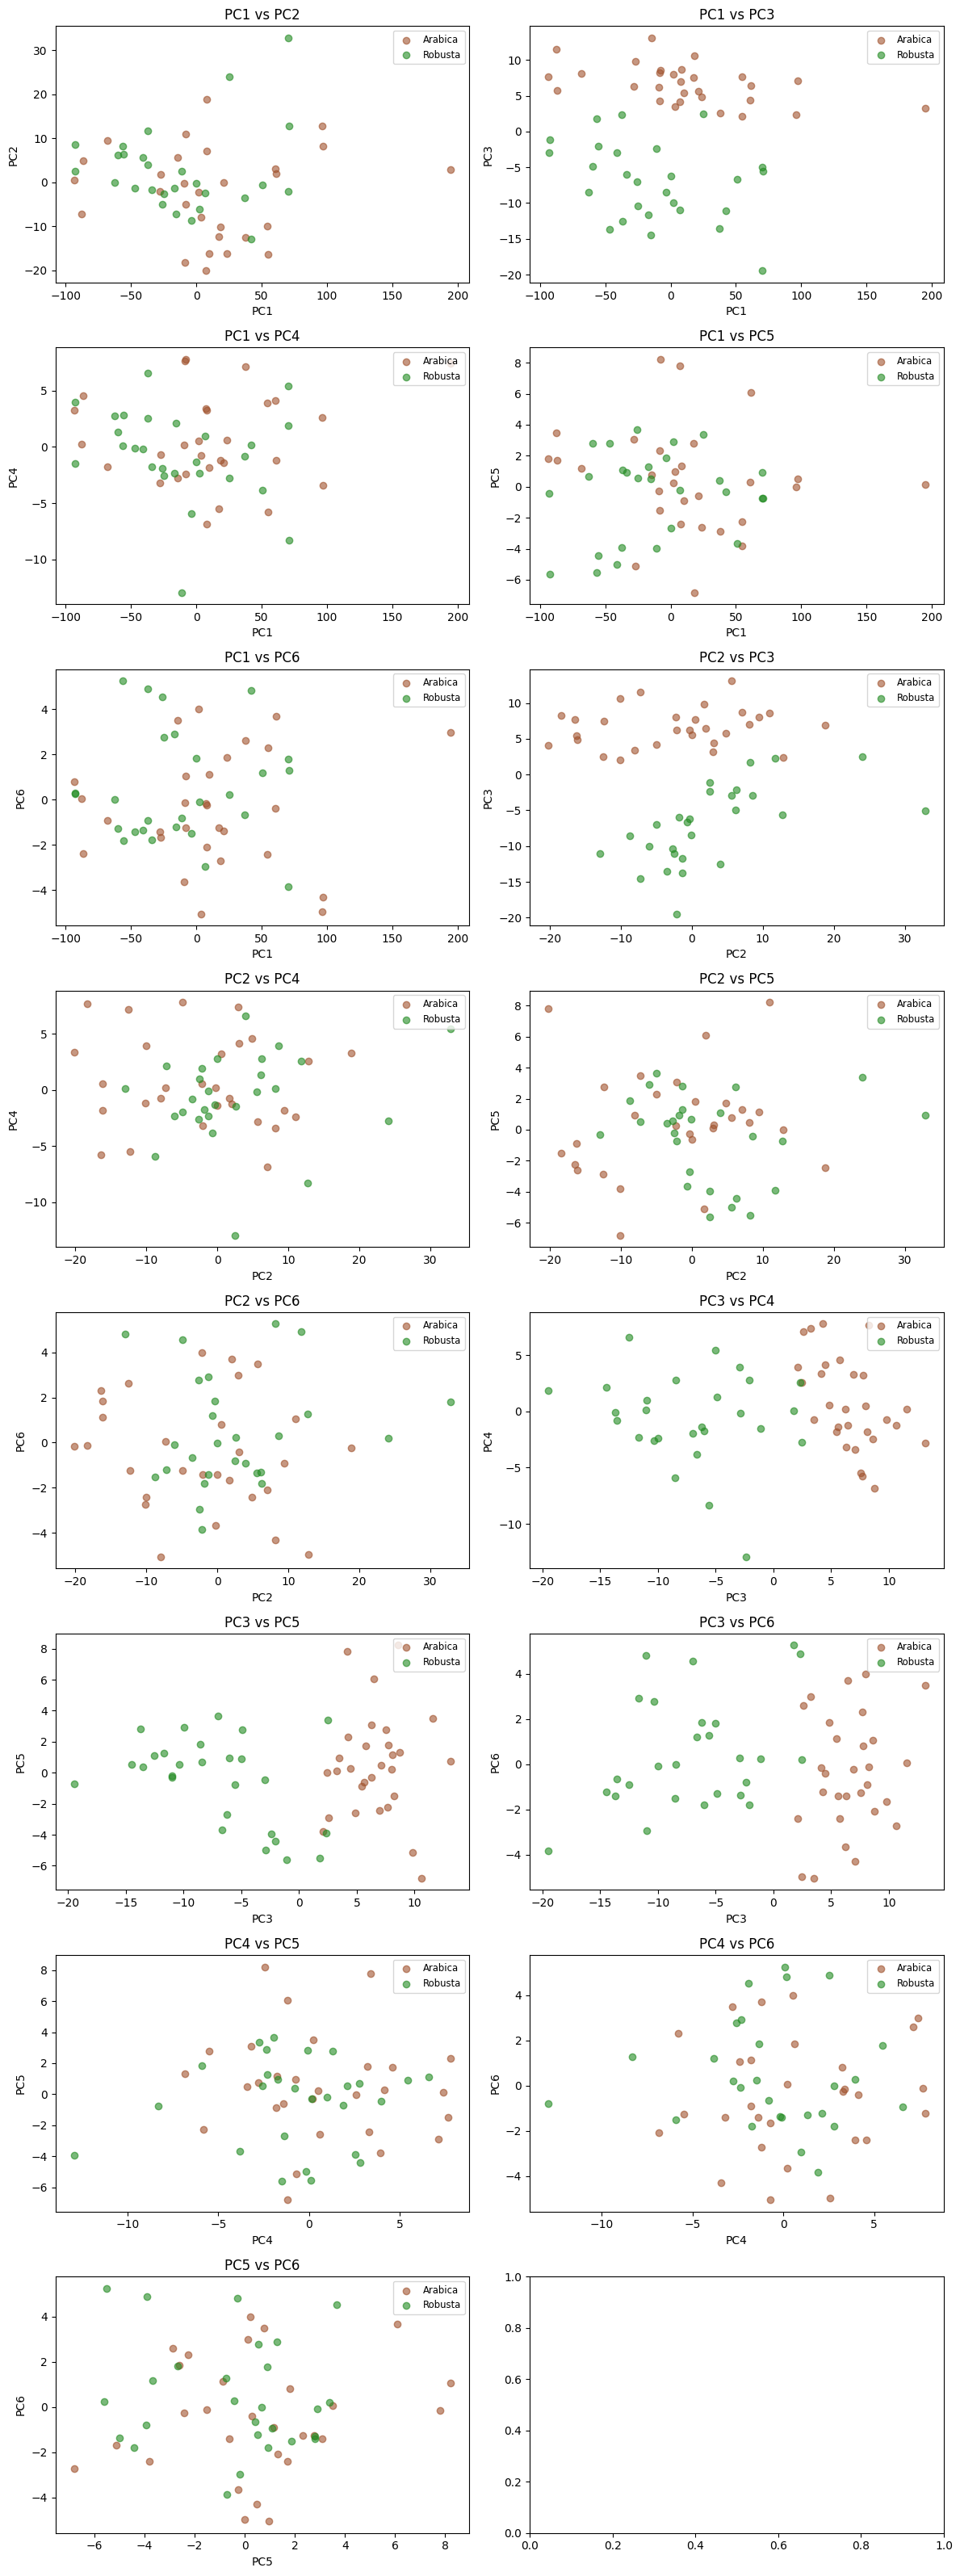

In [29]:
import itertools

# 1) Prepare class splits
labels = np.array(y)
is_arabica = (labels == "Arabica")
is_robusta = ~is_arabica

# 2) Generate all unique index pairs (0-based for PC1..PC5)
pairs = list(itertools.combinations(range(6), 2))

# 3) Create subplots: 5 rows × 2 cols
fig, axes = plt.subplots(8, 2, figsize=(12, 32), sharex=False, sharey=False)
axes = axes.ravel()  # flatten to 1D array of 10 axes

for ax, (i, j) in zip(axes, pairs):
    # scatter by class
    ax.scatter(Y_PC[is_arabica, i], Y_PC[is_arabica, j],
               c='sienna', alpha=0.6, label='Arabica')
    ax.scatter(Y_PC[is_robusta, i], Y_PC[is_robusta, j],
               c='forestgreen', alpha=0.6, label='Robusta')
    ax.set_xlabel(f"PC{i+1}")
    ax.set_ylabel(f"PC{j+1}")
    ax.set_title(f"PC{i+1} vs PC{j+1}")
    ax.legend(loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()

(PC1, PC3) shows an almost perfect separation of the 2 classes.

### Use the six most important principal components for reconstructing one Arabica and one Robusta spectrum. 


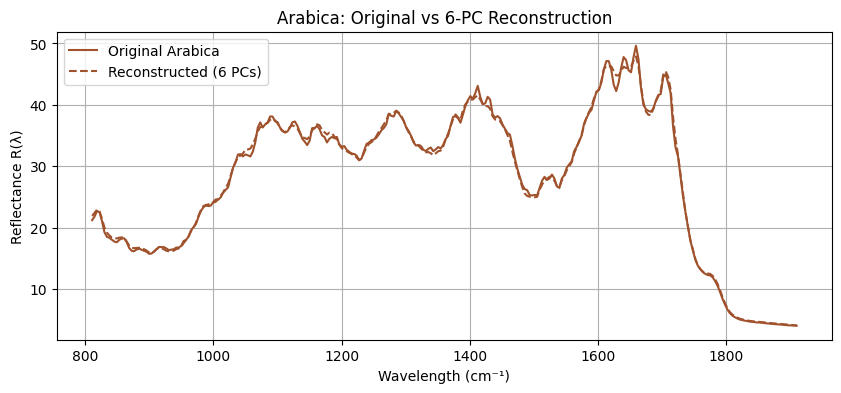

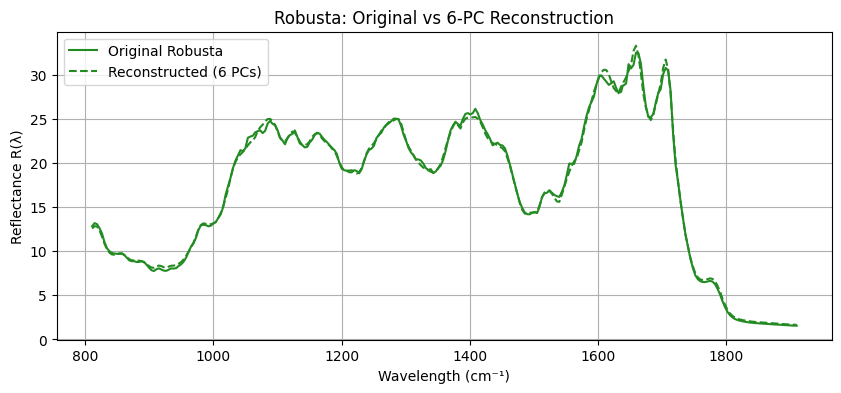

In [30]:
mu = X.mean(axis=0).to_numpy() # shape (D,)

# choose sample indices
iA, iR = 0, 29

# extract original and centered
xA = X.iloc[iA].to_numpy()
xR = X.iloc[iR].to_numpy()

# PC scores
yA = Y_PC[iA, :]   # shape (6,)
yR = Y_PC[iR, :]

# reconstruct
xA_hat = mu + V.dot(yA)
xR_hat = mu + V.dot(yR)

# plot Arabica
plt.figure(figsize=(10,4))
plt.plot(X_arabica.columns.astype(float), xA, color='sienna', label='Original Arabica')
plt.plot(X_arabica.columns.astype(float), xA_hat,'--', color='sienna', label='Reconstructed (6 PCs)')
plt.xlabel("Wavelength (cm⁻¹)")
plt.ylabel("Reflectance R(λ)")
plt.title("Arabica: Original vs 6-PC Reconstruction")
plt.legend()
plt.grid(True)
plt.show()

# plot Robusta
plt.figure(figsize=(10,4))
plt.plot(X_arabica.columns.astype(float), xR, color='forestgreen', label='Original Robusta')
plt.plot(X_arabica.columns.astype(float), xR_hat,'--', color='forestgreen', label='Reconstructed (6 PCs)')
plt.xlabel("Wavelength (cm⁻¹)")
plt.ylabel("Reflectance R(λ)")
plt.title("Robusta: Original vs 6-PC Reconstruction")
plt.legend()
plt.grid(True)
plt.show()